<a href="https://colab.research.google.com/github/stephenbeckr/numerical-analysis-class/blob/master/Demos/Ch3_PolynomialInterpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Interpolation (Lagrange form/Barycentric)

There are excellent python demos already online, from the CS version of this class and from the Driscoll and Braun textbook; see below for links.

References:
- [Berrut and Trefethen paper on Barycentric interpolation, SIAM Review 2004](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf)
- Jed Brown's [CSCI 3656 Interpolation jupyter notebook](https://github.com/cu-numcomp/numcomp-class/blob/master/Interpolation.ipynb). [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cu-numcomp/numcomp-class/blob/master/Interpolation.ipynb)

- Driscoll and Braun's textbook on numerical analysis has code in Matlab, Python and Julia. Here are their [core routines for interpolation](https://github.com/tobydriscoll/fnc-extras/blob/master/python/FNC09.py) as well as their [jupyter notebook with demos](https://github.com/tobydriscoll/fnc-extras/blob/master/python/Chapter09.ipynb) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tobydriscoll/fnc-extras/blob/master/python/Chapter09.ipynb) 
  - If you run their jupyter notebook, you may need to download some files, using something like:

```
!curl -O https://raw.githubusercontent.com/tobydriscoll/fnc-extras/master/python/FNC[01-13].py
!curl -O https://raw.githubusercontent.com/tobydriscoll/fnc-extras/master/python/FNC.py
```

  - See also the [main page for their book](https://tobydriscoll.net/project/fnc/)

In [ ]:
# Download the files from Driscoll and Braun:
!wget https://github.com/tobydriscoll/fnc-extras/raw/master/python/FNC09.py
from FNC09 import polyinterp
import numpy as np

## If you want to see how to use the code

In [ ]:
?polyinterp

## Make our own functions and interpolate

In [ ]:
f = lambda x : 1/x 
x  = [1,2,4]
x  = np.array(x)
p  = polyinterp( x, f(x) )  # returns a function that we can then query
p(3)

x   = np.array( [2,6] )
p   = polyinterp( x, f(x) )
p(4)

array(0.33333333)

(-2.0, 4.0)

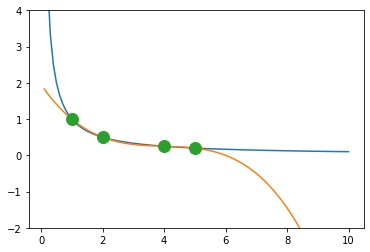

In [ ]:
import matplotlib.pyplot as plt

f   = lambda x : 1/x 
x   = np.array( [1,2,4,5])
p   = polyinterp( x, f(x) )

xGrid = np.linspace(.1,10,100)
plt.plot( xGrid, f(xGrid) )
plt.plot( xGrid, p(xGrid) );
plt.plot( x, f(x),'o',markerSize = 12 );
plt.ylim( -2,4 );

## Take a look at the code for Barycentric interpolation

In [ ]:
# Or, see the code from Driscoll and Bruan:
import numpy as np
def polyinterp(t,y):
    """
    polyinterp(t,y)
    Return a callable polynomial interpolant through the points in vectors `t`,`y`. Uses
    the barycentric interpolation formula.
    """
    n = len(t)-1
    C = (t[-1]-t[0]) / 4       # scaling factor to ensure stability
    tc = t/C

    # Adding one node at a time, compute inverses of the weights.
    omega = np.ones(n+1)
    for m in range(n):
        d = tc[:m+1] - tc[m+1]          # vector of node differences
        omega[:m+1] = omega[:m+1]*d     # update previous
        omega[m+1] = np.prod( -d )         # compute the new one
    w = 1 / omega                   # go from inverses to weights

    def p(x):
        # Compute interpolant.
        z = np.where(x==t)[0]
        if len(z)>0:       # avoid dividing by zero
            # Apply L'Hopital's Rule exactly.
             f = y[z[0]]
        else:
            terms = w / (x - t)
            f = np.sum(y*terms) / np.sum(terms)
        return f
        
    return np.vectorize(p)  # converts to the right data type

# Using Scipy and Numpy libraries

- Task: experiment with interpolating a Gaussian

We'll explore these libraries:
1. `numpy`  ([`numpy.interp`](https://numpy.org/doc/stable/reference/generated/numpy.interp.html))
2. `scipy.interpolate` [tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) and [full documentation](https://docs.scipy.org/doc/scipy/reference/interpolate.html#module-scipy.interpolate)
3. [https://github.com/chebpy/chebpy](`chebpy`), a Python wrapper for [chebfun](https://www.chebfun.org/)

In [15]:
import numpy as np
import scipy.interpolate as scinterp
import matplotlib.pyplot as plt

# Make a function
gaussian = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-.5*x**2)

n = 6  # use n points, so polynomial can be of degree n-1
a, b = -5, 5  # the interval [a,b] that we're interested in
nodes = np.linspace(a,b,n)
xGrid = np.linspace(a,b,100)  # much finer grid, for plotting

## Run numpy's interpolation

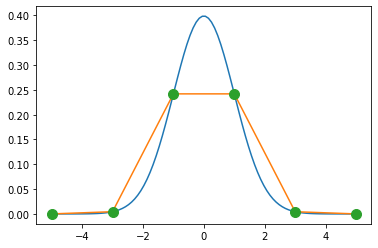

In [16]:
# Run numpy's interpolation.  What kind of interpolation is this?
#    It's restricted to piecewise linear
pGrid = np.interp(xGrid, nodes, gaussian(nodes) )

plt.plot(xGrid,gaussian(xGrid),'-',label='Original function');
plt.plot(xGrid,pGrid,'-',label='numpy.interp')
plt.plot(nodes,gaussian(nodes),'o',label='Data',markersize = 10);

## Run Scipy's interpolation
We now have many more options. We're not just linear, and we can control the degree of the polynomial

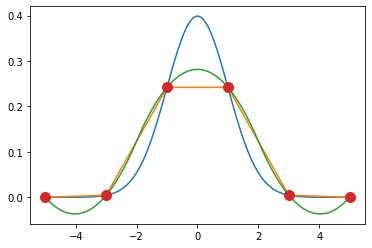

In [19]:
pLinear = scinterp.interp1d(nodes,gaussian(nodes)) # this returns a function
pQuad = scinterp.interp1d(nodes,gaussian(nodes),kind='quadratic') # this returns a function
plt.plot(xGrid,gaussian(xGrid),'-',label='Original function');
plt.plot(xGrid,pLinear(xGrid),'-',label='scipy.interp1d, linear')
plt.plot(xGrid,pQuad(xGrid),'-',label='scipy.interp1d, quadratic')
plt.plot(nodes,gaussian(nodes),'o',label='Data',markersize = 10);

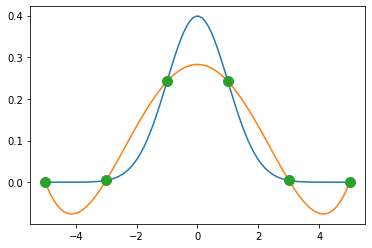

In [21]:
pGrid = scinterp.barycentric_interpolate(nodes,gaussian(nodes),xGrid)
plt.plot(xGrid,gaussian(xGrid),'-',label='Original function');
plt.plot(xGrid,pGrid,'-',label='Barycentric interpolation')
plt.plot(nodes,gaussian(nodes),'o',label='Data',markersize = 10);